# Wine Quality Analysis with Logistic Regression & Linear Regression

This notebook analyzes wine quality datasets using logistic regression to predict wine quality based on physicochemical properties.

## Dataset Information
- **Source**: Portuguese "Vinho Verde" wine samples (https://archive.ics.uci.edu/dataset/186/wine+quality)
- **Types**: Red and white wine variants
- **Features**: 11 physicochemical properties
- **Target**: Wine quality (score 3-9)
- **Task**: Classification/Regression problem

## 1. Import Libraries and Setup

Loading all the libraries + defining dataset directory

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define dataset directory
DATA_DIR = Path('datasets/wines')
print(f"Data directory exists: {DATA_DIR.exists()}")

Data directory exists: True


## 2. Data Loading and Basic Information

Concatconcatenating the red and white wine datasets into one and getting basic info like shape, columns, and data types.

In [2]:
# Load red and white wine datasets
red_wine = pd.read_csv(DATA_DIR / 'winequality-red.csv', sep=';')
white_wine = pd.read_csv(DATA_DIR / 'winequality-white.csv', sep=';')

# Add wine type column
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Combine datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

print("Dataset Shape Information:")
print(f"Red wine samples: {red_wine.shape[0]}")
print(f"White wine samples: {white_wine.shape[0]}")
print(f"Combined dataset: {wine_data.shape}")
print(f"Features: {wine_data.shape[1]}")

Dataset Shape Information:
Red wine samples: 1599
White wine samples: 4898
Combined dataset: (6497, 13)
Features: 13


In [3]:
# Display basic dataset information
print("Dataset Info:")
print("\nColumn Names:")
print(wine_data.columns.tolist())

print("\nData Types:")
print(wine_data.dtypes)

print("\nMissing Values:")
print(wine_data.isnull().sum())

print("\nFirst 5 rows:")
display(wine_data.head())

Dataset Info:

Column Names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'wine_type']

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
win

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# Statistical summary
print("Statistical Summary:")
display(wine_data.describe())

Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 3. Target Variable Analysis

Check how many wines have each quality scores.

In [5]:
# Analyze target variable (quality)
print("Quality Distribution:")
quality_counts = wine_data['quality'].value_counts().sort_index()
print(quality_counts)

print("\nQuality Statistics:")
print(f"Min Quality: {wine_data['quality'].min()}")
print(f"Max Quality: {wine_data['quality'].max()}")
print(f"Mean Quality: {wine_data['quality'].mean():.2f}")
print(f"Median Quality: {wine_data['quality'].median()}")

Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

Quality Statistics:
Min Quality: 3
Max Quality: 9
Mean Quality: 5.82
Median Quality: 6.0


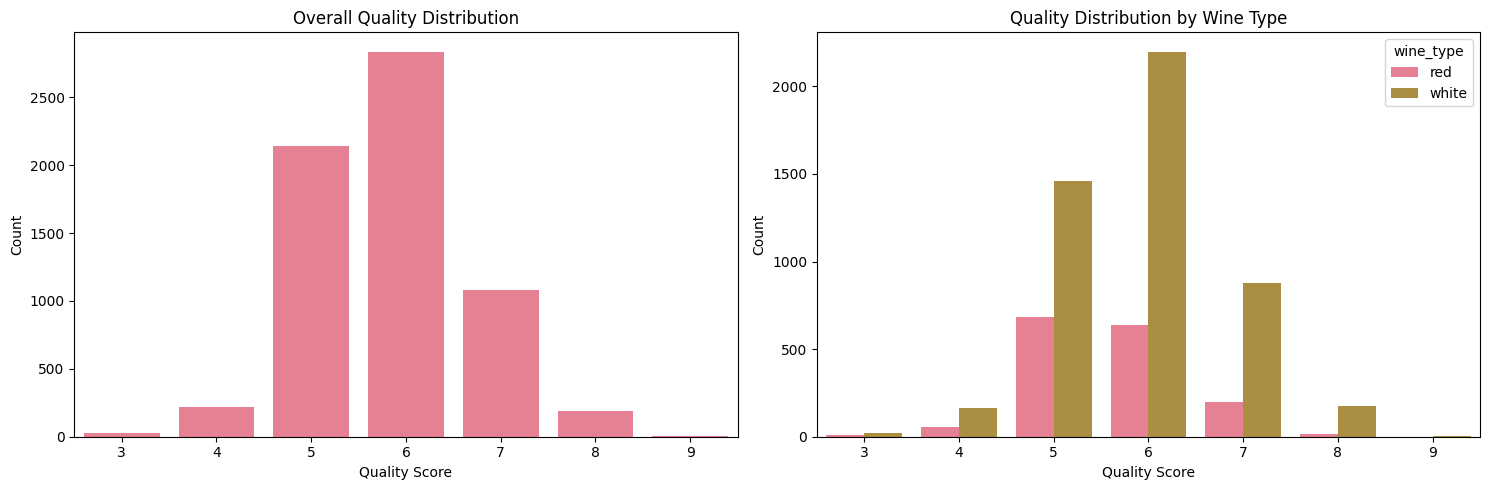

In [6]:
# Visualize quality distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall quality distribution
sns.countplot(data=wine_data, x='quality', ax=axes[0])
axes[0].set_title('Overall Quality Distribution')
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Count')

# Quality by wine type
sns.countplot(data=wine_data, x='quality', hue='wine_type', ax=axes[1])
axes[1].set_title('Quality Distribution by Wine Type')
axes[1].set_xlabel('Quality Score')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Graph Explanation:** 
- **Left plot**: Shows most wines are average quality (5-6), few are excellent (8-9) or poor (3-4)
- **Right plot**: White wines dominate the dataset, both types follow similar quality patterns
- **Key insight**: Dataset is imbalanced - mostly average quality wines

## 4. Feature Distribution Analysis

Examining each feature individually. 

In [7]:
# Get numeric columns (excluding quality and wine_type)
numeric_features = wine_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('quality')  # Remove target variable

print(f"Numeric features ({len(numeric_features)}):")
for i, feature in enumerate(numeric_features, 1):
    print(f"{i:2d}. {feature}")

Numeric features (11):
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol


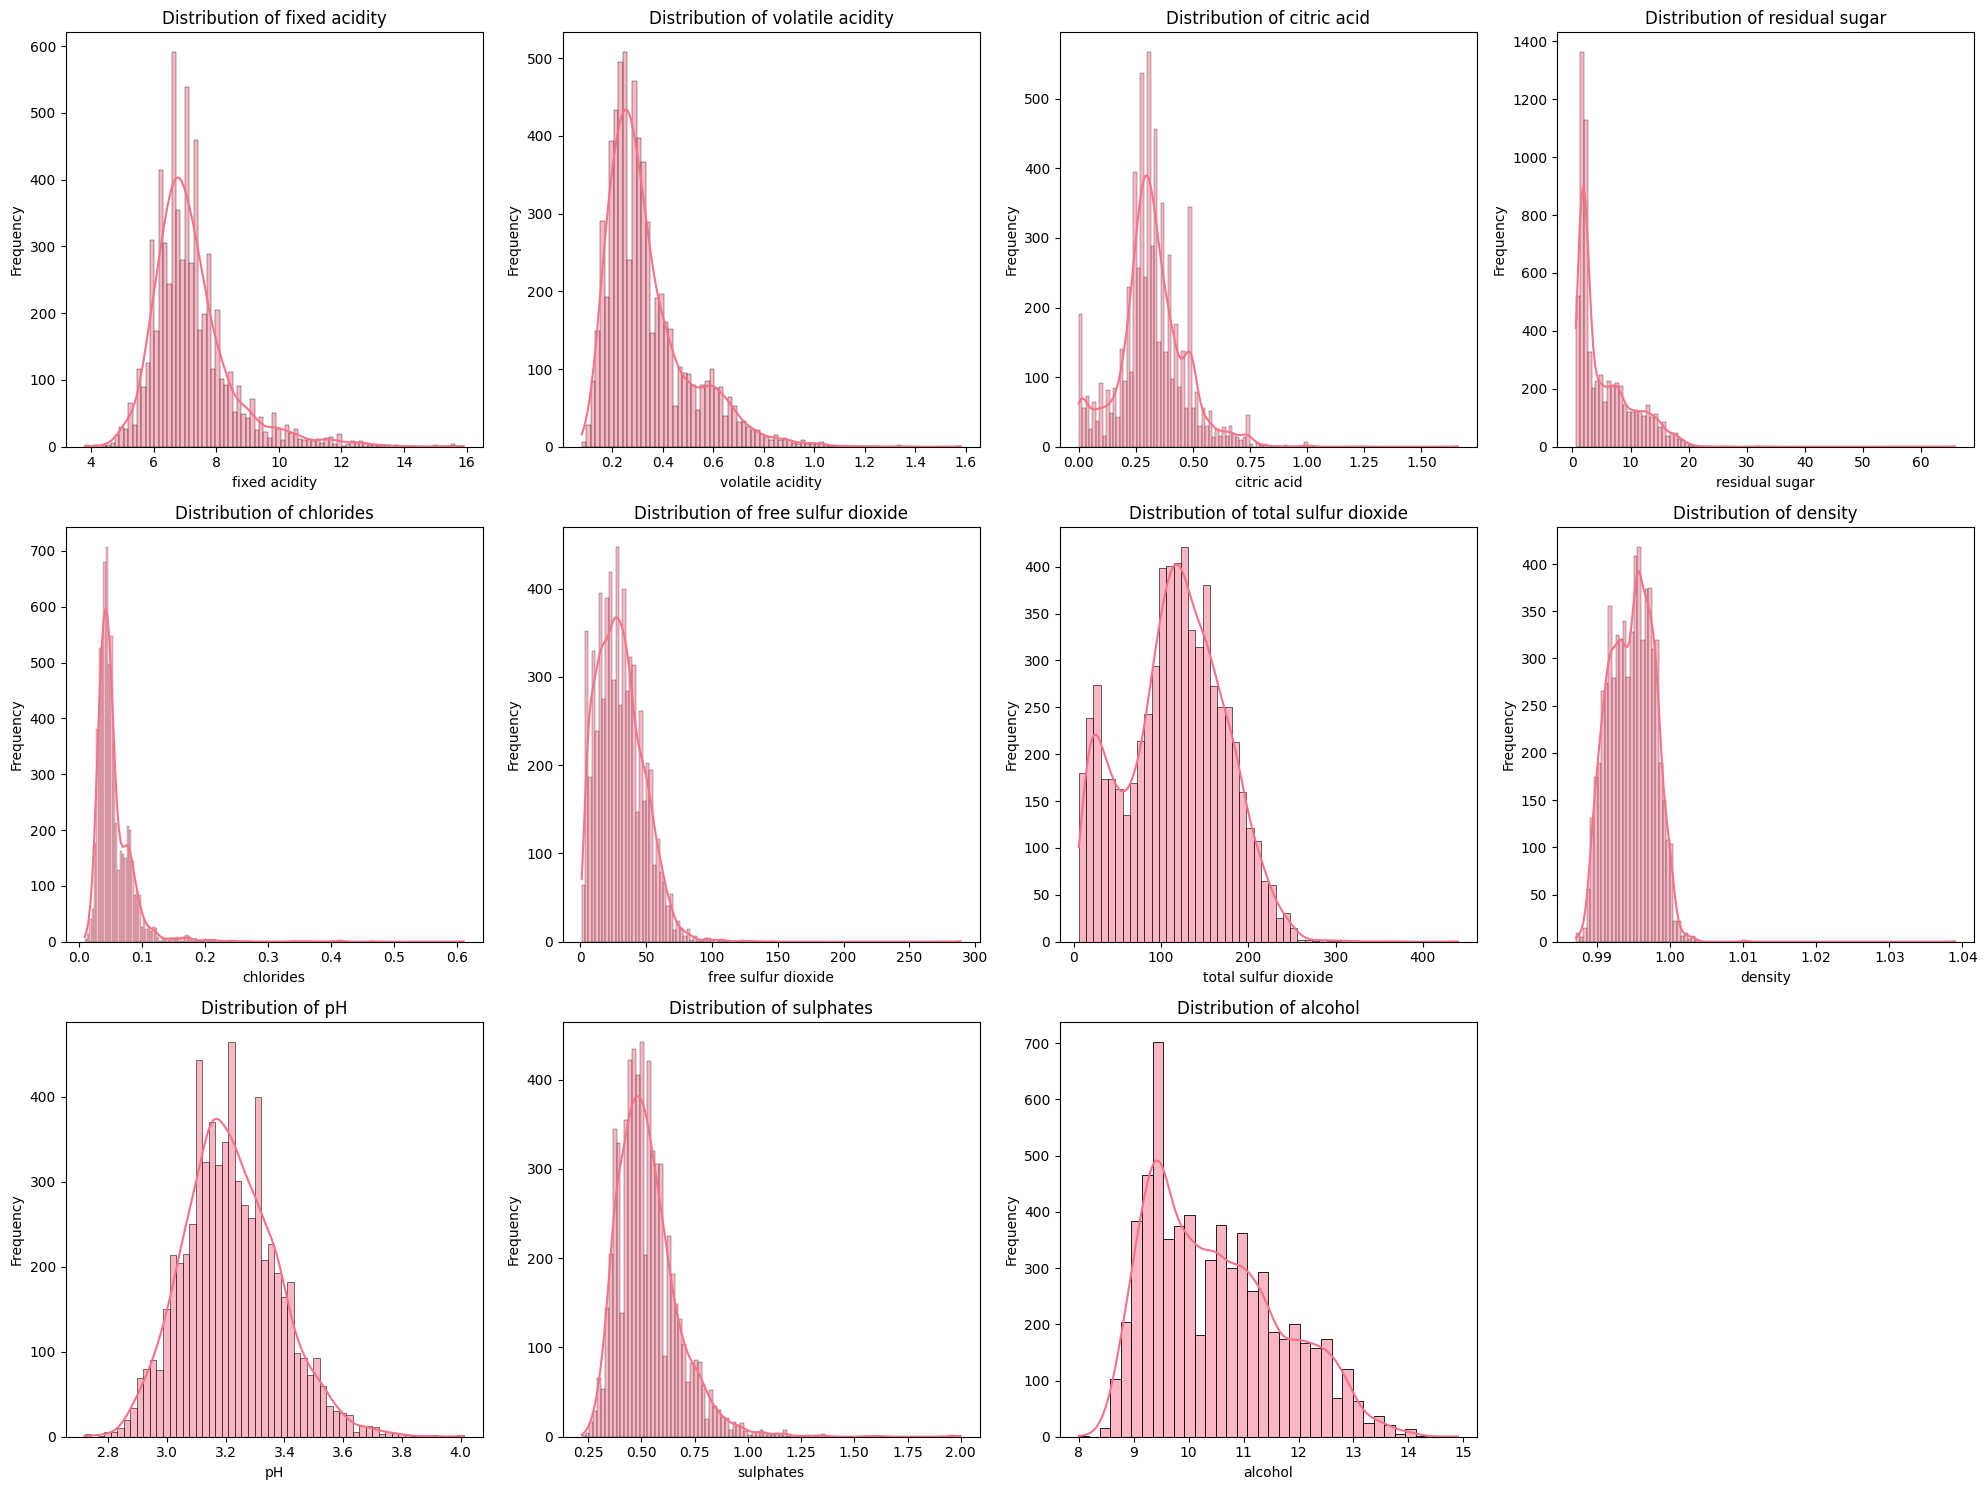

In [8]:
# Feature distribution histograms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.histplot(wine_data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide empty subplot
if len(numeric_features) < len(axes):
    axes[len(numeric_features)].set_visible(False)

plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Histograms**: Show data distribution shape for each chemical property
- **Skewed features**: Residual sugar, chlorides, free sulfur dioxide (long right tails)
- **Normal-ish features**: pH, density, alcohol (bell-shaped curves)
- **Key insight**: Some features need transformation due to extreme skewness

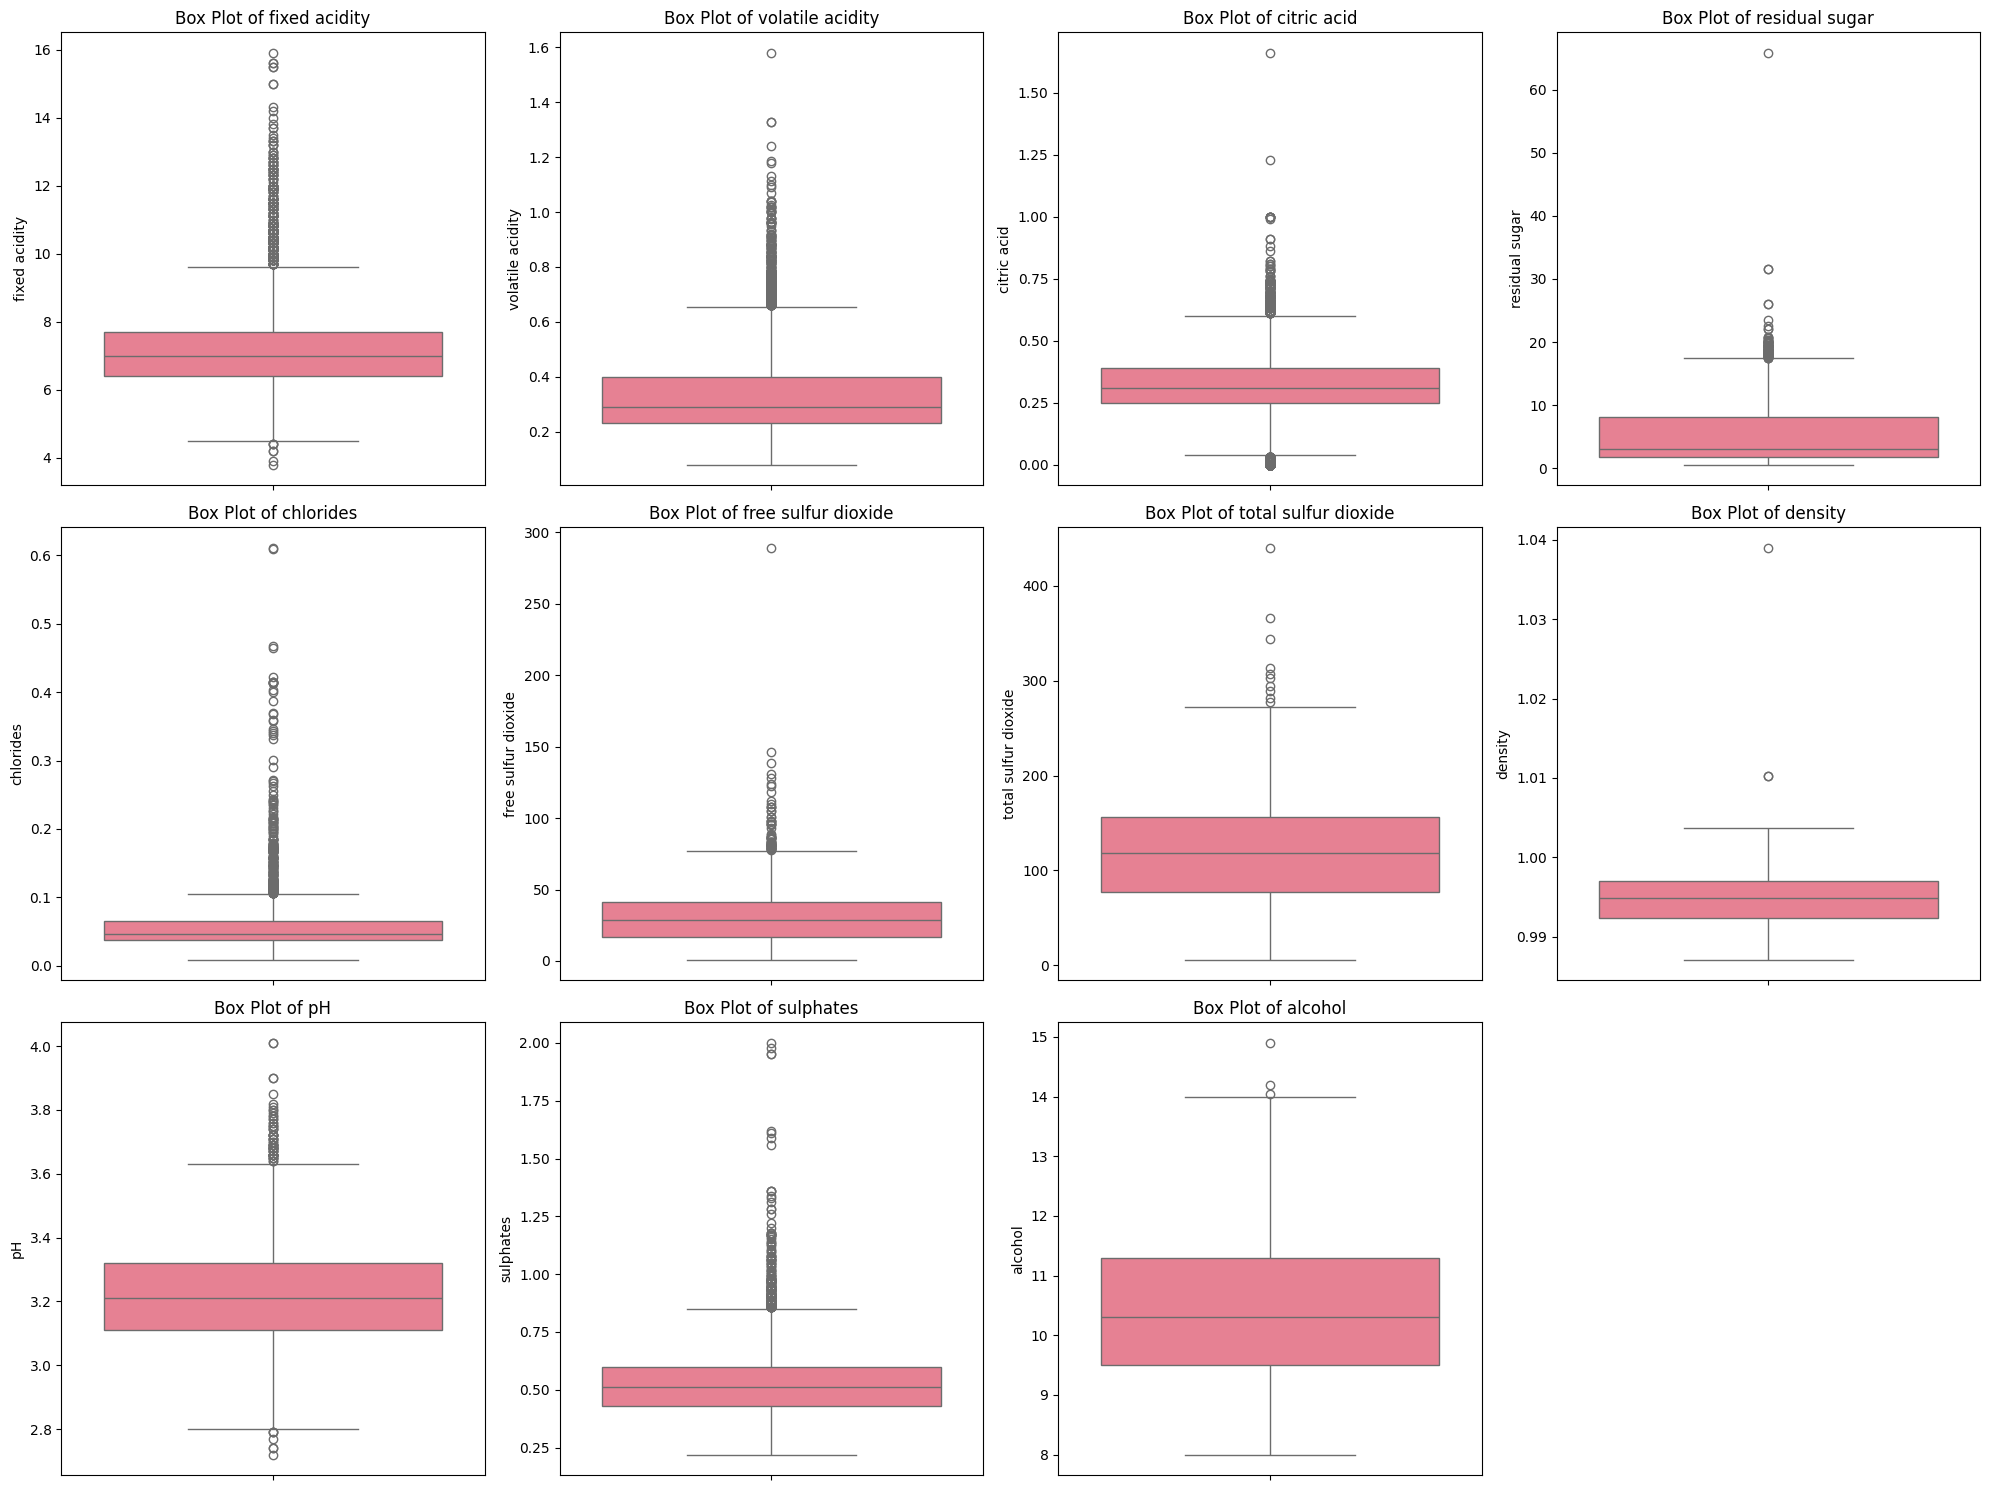

In [9]:
# Box plots to identify outliers
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    sns.boxplot(y=wine_data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel(feature)

# Hide empty subplot
if len(numeric_features) < len(axes):
    axes[len(numeric_features)].set_visible(False)

plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Box plots**: Show median (line), quartiles (box), and outliers (dots) for each feature
- **Heavy outliers**: Residual sugar, free/total sulfur dioxide have many extreme values
- **Clean features**: pH, alcohol have fewer outliers
- **Key insight**: Outliers might affect model performance, may need handling

## 5. Correlation Analysis

Finding correlationships between features. The correlation matrix shows which chemical properties are related to each other and to wine quality. High correlations (close to +1 or -1) indicate strong relationships.

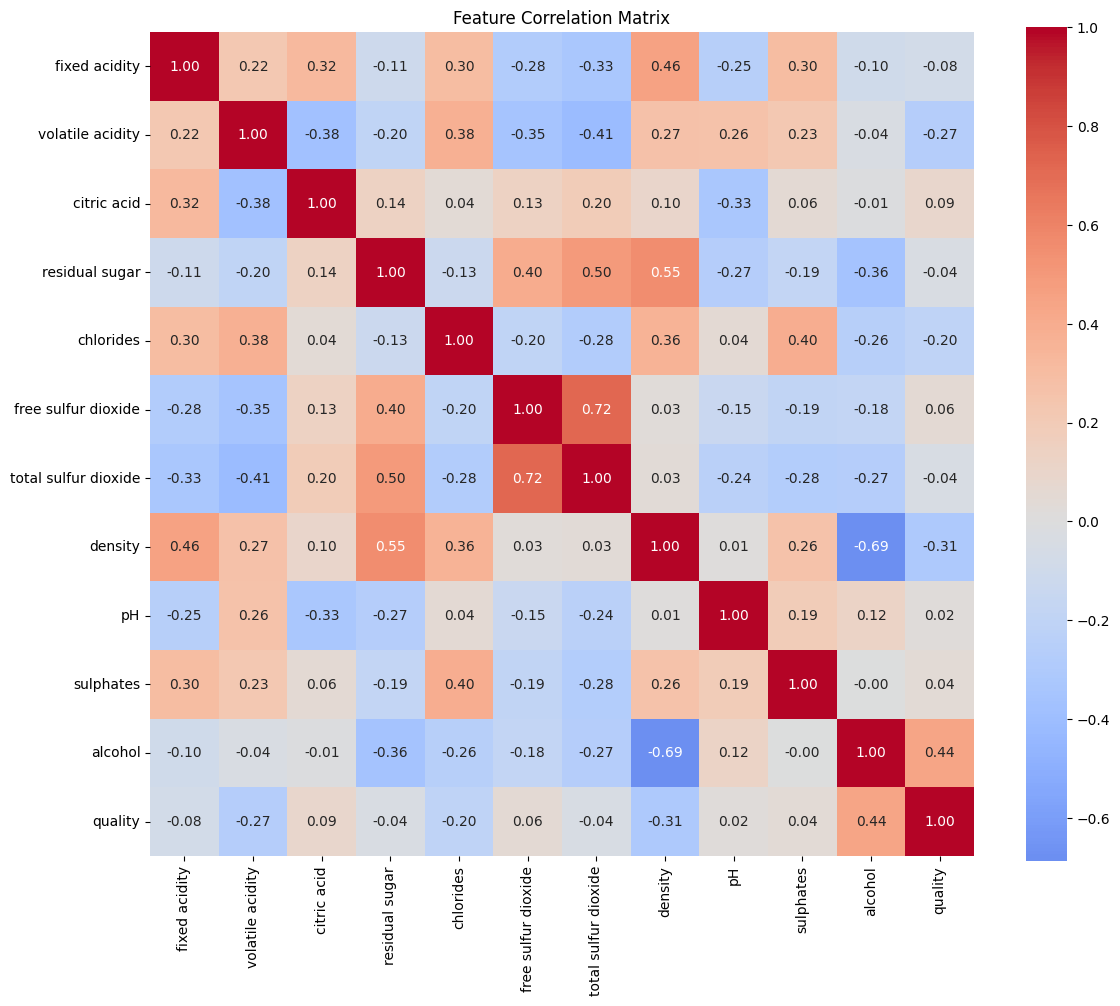

In [10]:
# Correlation matrix
correlation_matrix = wine_data[numeric_features + ['quality']].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Heatmap colors**: Red = positive correlation, Blue = negative correlation, White = no correlation
- **Strong correlations**: Total/free sulfur dioxide, fixed acidity/citric acid/density
- **Quality relationships**: Alcohol (+), volatile acidity (-), sulphates (+) strongly affect quality
- **Key insight**: Some features are redundant (highly correlated), others are key quality predictors

In [11]:
# Features most correlated with quality
quality_correlations = correlation_matrix['quality'].abs().sort_values(ascending=False)
print("Features ranked by absolute correlation with quality:")
print(quality_correlations)

Features ranked by absolute correlation with quality:
quality                 1.000000
alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64


## 6. Feature Visualization by Quality

Taking the important features (highest correlation with quality) and visualizing how they differ between low, medium, and high quality wines. This gives us info about wine being good or bad.

In [12]:
# Select top correlated features for detailed analysis
top_features = quality_correlations.drop('quality').head(6).index.tolist()

# Create quality groups for better visualization
wine_data['quality_group'] = pd.cut(wine_data['quality'], 
                                   bins=[2, 5, 6, 9], 
                                   labels=['Low (3-5)', 'Medium (6)', 'High (7-9)'])

print(f"Analyzing top {len(top_features)} features most correlated with quality:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature} (correlation: {quality_correlations[feature]:.3f})")

Analyzing top 6 features most correlated with quality:
1. alcohol (correlation: 0.444)
2. density (correlation: 0.306)
3. volatile acidity (correlation: 0.266)
4. chlorides (correlation: 0.201)
5. citric acid (correlation: 0.086)
6. fixed acidity (correlation: 0.077)


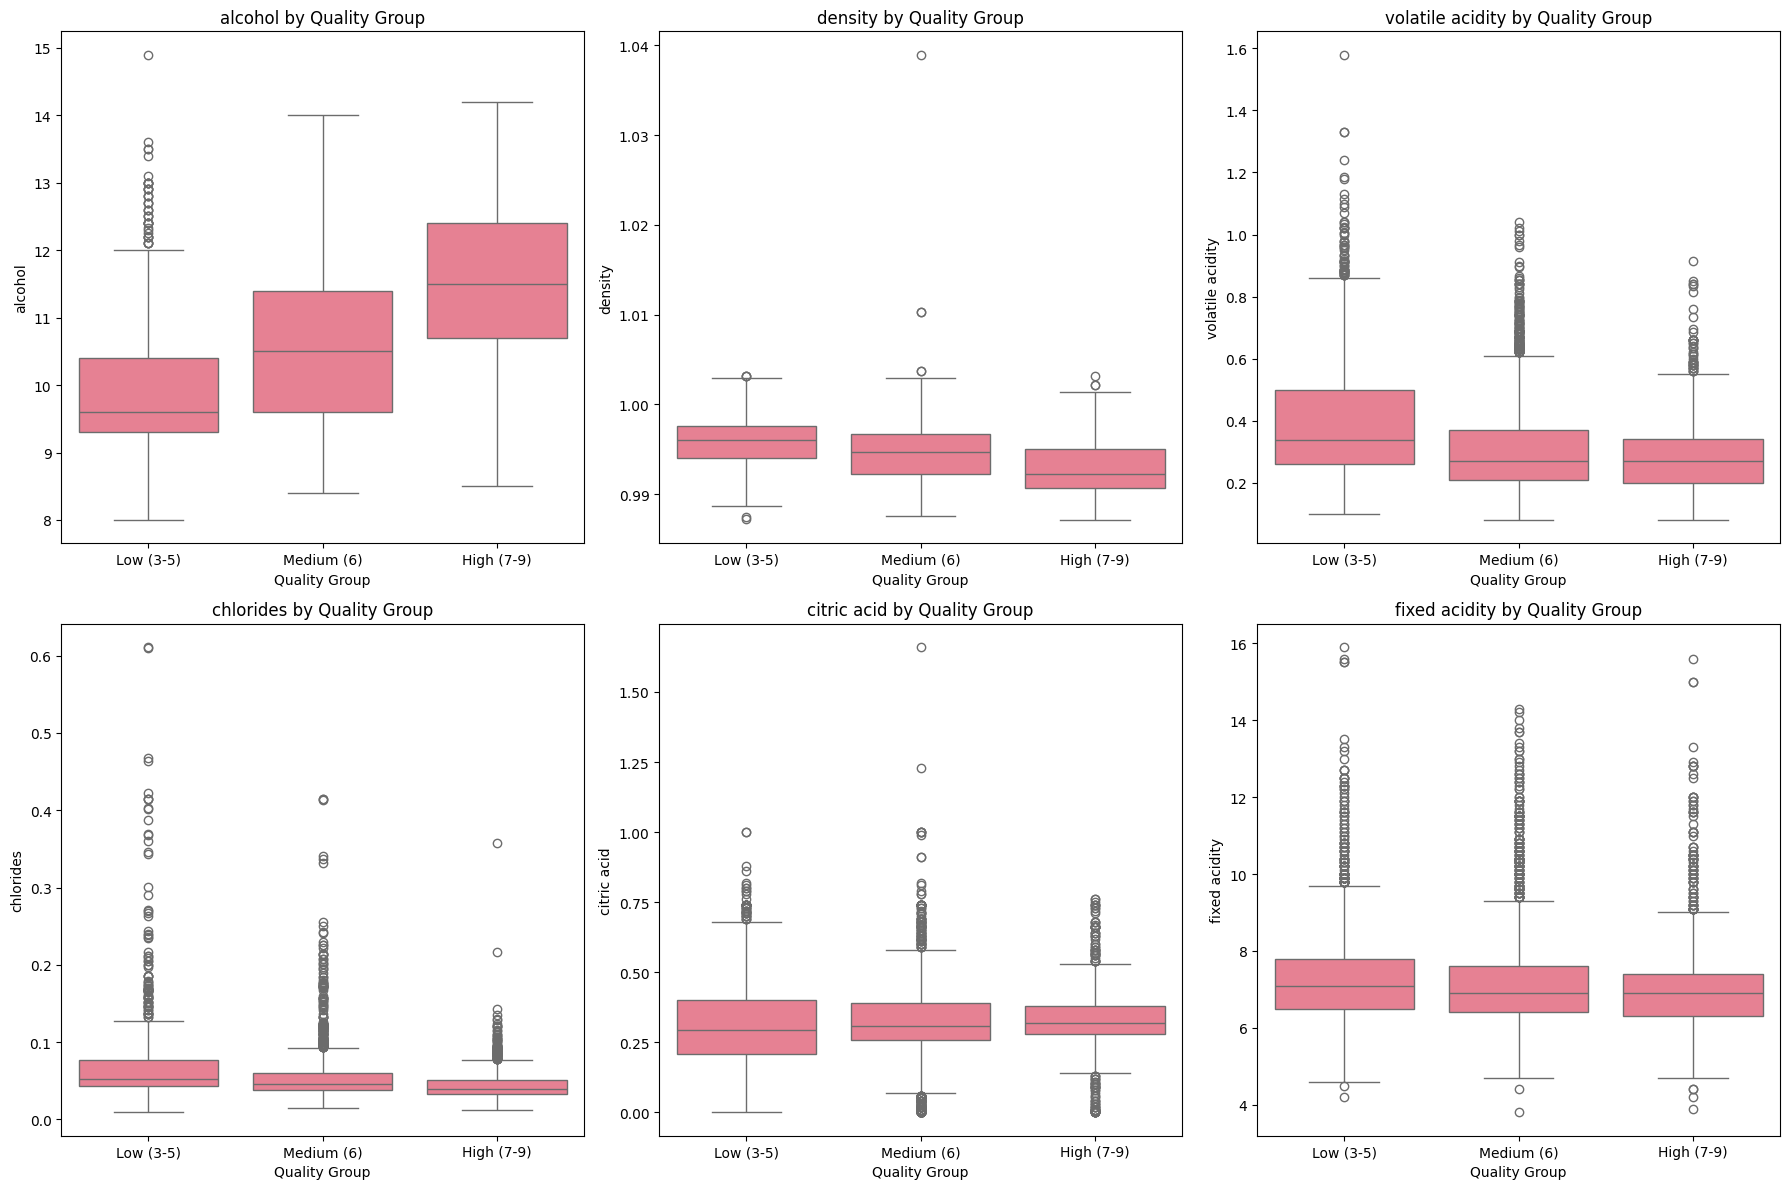

In [13]:
# Box plots of top features by quality group
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    sns.boxplot(data=wine_data, x='quality_group', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} by Quality Group')
    axes[i].set_xlabel('Quality Group')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Clear trends**: High quality wines have higher alcohol, lower volatile acidity, higher sulphates
- **Box separation**: Good separation between quality groups indicates features are discriminative
- **Overlap areas**: Some overlap between groups shows classification won't be perfect
- **Key insight**: These top features can effectively distinguish wine quality levels

## 7. Data Preprocessing and Normalization

Preparing data for data training process. We convert wine type to binary (true or false), split data into training/testing sets, and normalize features so they're all on the same scale. 

In [14]:
# Prepare features and target
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode wine type
label_encoder = LabelEncoder()
wine_data['wine_type_encoded'] = label_encoder.fit_transform(wine_data['wine_type'])

# Prepare feature matrix X
feature_columns = numeric_features + ['wine_type_encoded']
X = wine_data[feature_columns].copy()

# Create binary target (quality >= 7 is considered 'good')
y_binary = (wine_data['quality'] >= 7).astype(int)

print("Feature matrix shape:", X.shape)
print("Target distribution:")
print(y_binary.value_counts(normalize=True))
print("\nFeatures used:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i:2d}. {col}")

Feature matrix shape: (6497, 12)
Target distribution:
quality
0    0.803448
1    0.196552
Name: proportion, dtype: float64

Features used:
 1. fixed acidity
 2. volatile acidity
 3. citric acid
 4. residual sugar
 5. chlorides
 6. free sulfur dioxide
 7. total sulfur dioxide
 8. density
 9. pH
10. sulphates
11. alcohol
12. wine_type_encoded


In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

print("Data split information:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training target distribution: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Testing target distribution: {y_test.value_counts(normalize=True).round(3).to_dict()}")

Data split information:
Training set: 5197 samples
Testing set: 1300 samples
Training target distribution: {0: 0.804, 1: 0.196}
Testing target distribution: {0: 0.803, 1: 0.197}


In [16]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

print("Normalization completed!")
print("\nFeature scaling statistics (training set):")
print(f"Mean: {X_train_scaled.mean().round(3).to_dict()}")
print(f"Std: {X_train_scaled.std().round(3).to_dict()}")

Normalization completed!

Feature scaling statistics (training set):
Mean: {'fixed acidity': 0.0, 'volatile acidity': -0.0, 'citric acid': 0.0, 'residual sugar': -0.0, 'chlorides': -0.0, 'free sulfur dioxide': -0.0, 'total sulfur dioxide': 0.0, 'density': -0.0, 'pH': 0.0, 'sulphates': 0.0, 'alcohol': -0.0, 'wine_type_encoded': -0.0}
Std: {'fixed acidity': 1.0, 'volatile acidity': 1.0, 'citric acid': 1.0, 'residual sugar': 1.0, 'chlorides': 1.0, 'free sulfur dioxide': 1.0, 'total sulfur dioxide': 1.0, 'density': 1.0, 'pH': 1.0, 'sulphates': 1.0, 'alcohol': 1.0, 'wine_type_encoded': 1.0}


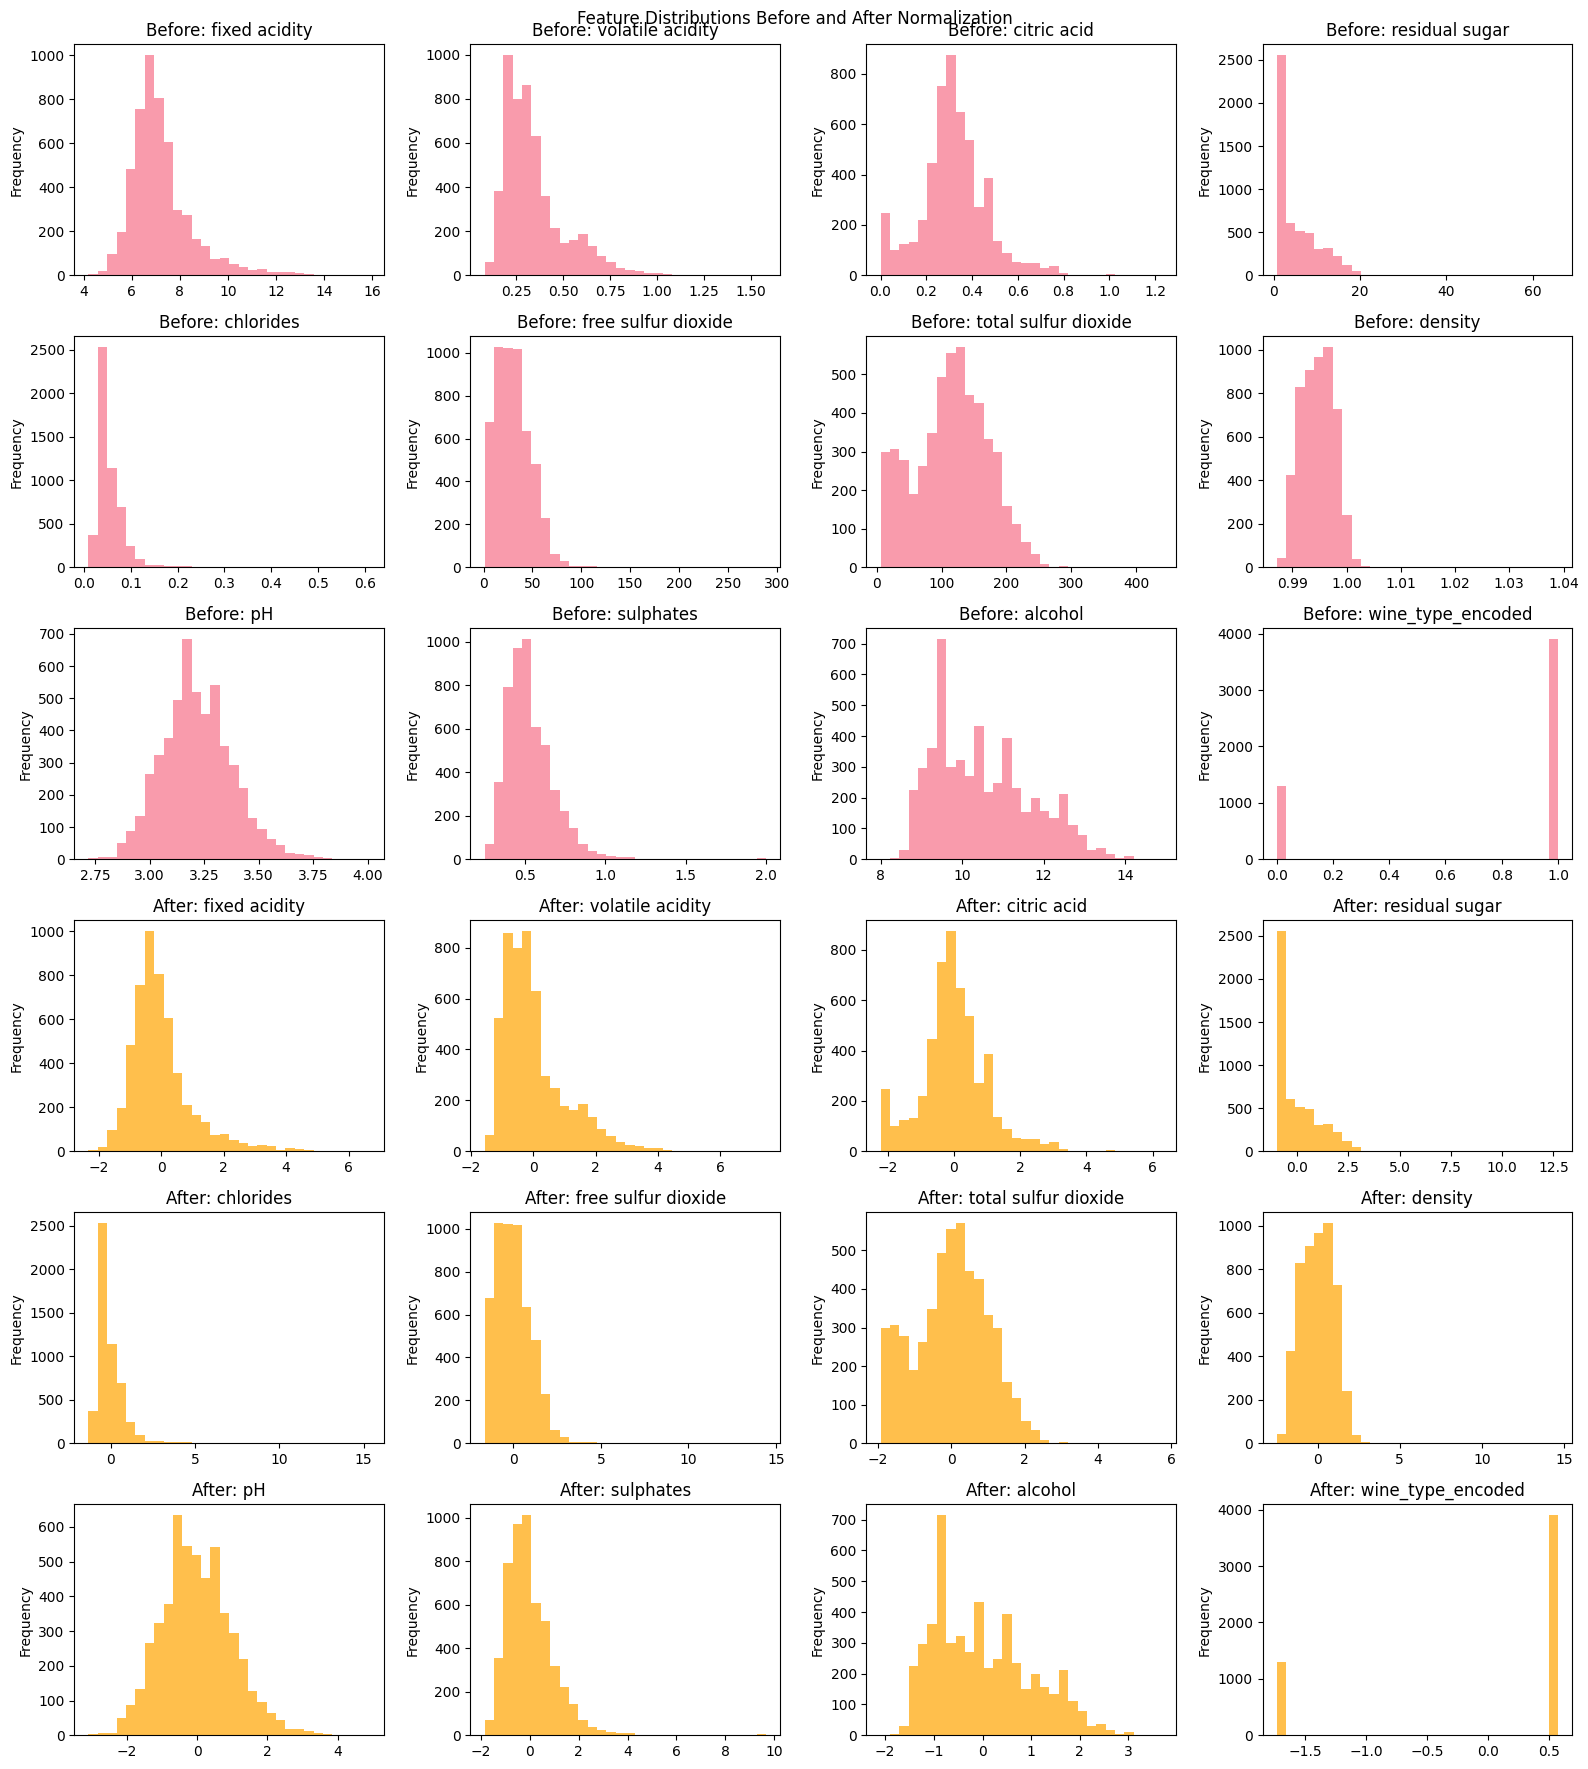

In [18]:
# Visualize normalization effect
n_features = len(feature_columns)
n_cols = min(6, n_features)  # Max 6 columns
n_rows = 2
if n_features > 6:
    n_cols = 4
    n_rows = int(np.ceil(n_features / n_cols)) * 2  # Double for before/after

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))

# Handle single column case
if n_cols == 1:
    axes = axes.reshape(-1, 1)
elif len(axes.shape) == 1:
    axes = axes.reshape(n_rows, -1)

# Before normalization (top row(s))
for i, feature in enumerate(feature_columns):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].hist(X_train[feature], bins=30, alpha=0.7)
    axes[row, col].set_title(f'Before: {feature}')
    axes[row, col].set_ylabel('Frequency')

# After normalization (bottom row(s))
offset = int(n_rows / 2)
for i, feature in enumerate(feature_columns):
    row = (i // n_cols) + offset
    col = i % n_cols
    axes[row, col].hist(X_train_scaled[feature], bins=30, alpha=0.7, color='orange')
    axes[row, col].set_title(f'After: {feature}')
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplots
total_plots_needed = n_features * 2
total_plots_available = n_rows * n_cols
for i in range(total_plots_needed, total_plots_available):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.suptitle('Feature Distributions Before and After Normalization')
plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Before (top)**: Features have different scales - some 0-1, others 0-100, creates bias in model
- **After (bottom)**: All features centered around 0 with similar spread (standard deviation = 1)
- **Shape preserved**: Distribution shapes stay the same, only scale changes
- **Key insight**: Normalization ensures all features contribute equally to model training

## 8. Logistic Regression Model

**What we're doing:** Training the actual machine learning model. Logistic regression learns patterns from the training data to predict wine quality. We fit the model on training data and make predictions on test data to evaluate performance.

In [19]:
# Import logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

# Create and train logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)
y_pred_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Model trained successfully!")
print(f"Model coefficients shape: {logistic_model.coef_.shape}")
print(f"Model intercept: {logistic_model.intercept_[0]:.4f}")

Logistic Regression Model trained successfully!
Model coefficients shape: (1, 12)
Model intercept: -1.9095


## 9. Feature Coefficients Analysis

It talks about how each feature affects the wine quality. Positive coefficients mean the feature increases quality probability, negative coefficients decrease it. 
- Larger absolute values = stronger influence.  

In [27]:
# Analyze feature coefficients (impact on loss function)
coefficients = logistic_model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients),
    'impact': ['Positive' if coef > 0 else 'Negative' for coef in coefficients]
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("Feature Coefficients Analysis:")
print("(Higher absolute values indicate stronger impact on predictions)")
print()
display(feature_importance)

Feature Coefficients Analysis:
(Higher absolute values indicate stronger impact on predictions)



,feature,coefficient,abs_coefficient,impact
7,density,-1.224933,1.224933,Negative
3,residual sugar,1.038138,1.038138,Positive
0,fixed acidity,0.615336,0.615336,Positive
1,volatile acidity,-0.597724,0.597724,Negative
10,alcohol,0.570005,0.570005,Positive
8,pH,0.391235,0.391235,Positive
9,sulphates,0.360934,0.360934,Positive
11,wine_type_encoded,-0.295385,0.295385,Negative
4,chlorides,-0.239690,0.239690,Negative
6,total sulfur dioxide,-0.225478,0.225478,Negative


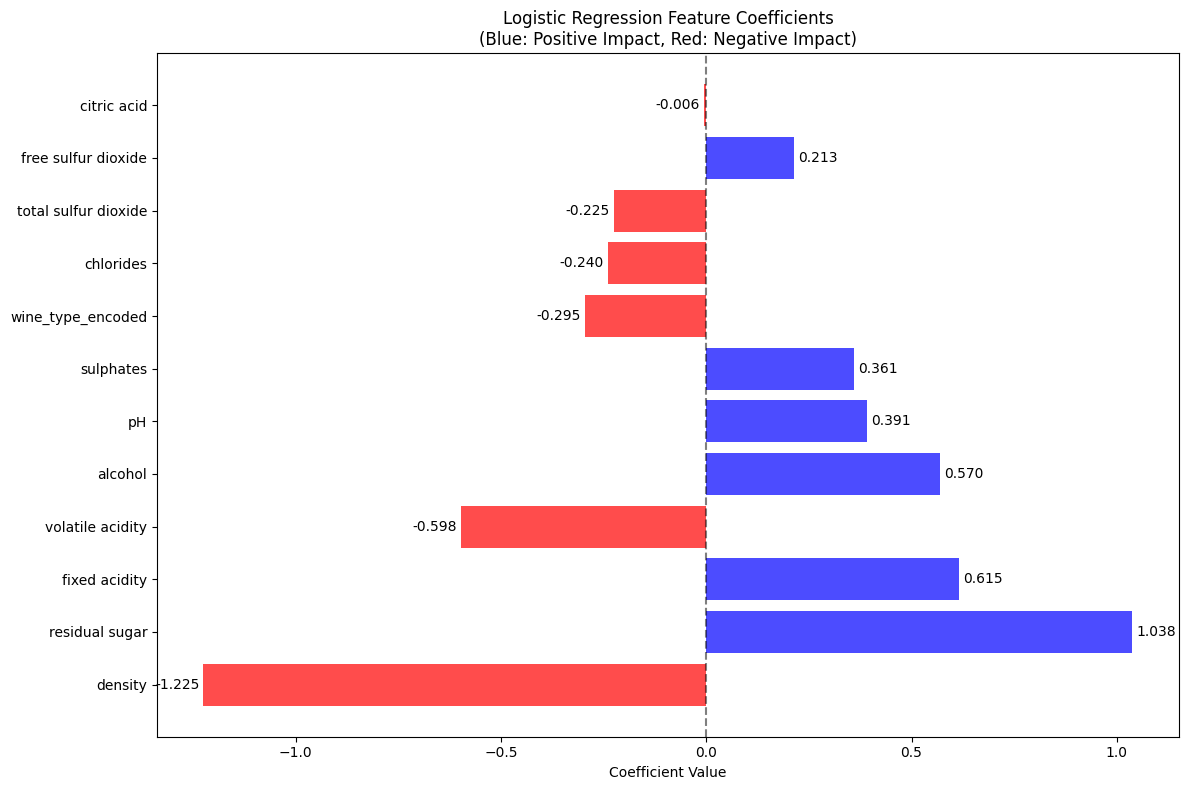

In [28]:
# Visualize feature coefficients
plt.figure(figsize=(12, 8))

# Create color map for positive/negative coefficients
colors = ['red' if coef < 0 else 'blue' for coef in feature_importance['coefficient']]

plt.barh(range(len(feature_importance)), feature_importance['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Coefficients\n(Blue: Positive Impact, Red: Negative Impact)')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

# Add value labels
for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['coefficient'] + 0.01 if row['coefficient'] > 0 else row['coefficient'] - 0.01, 
             i, f'{row["coefficient"]:.3f}', 
             ha='left' if row['coefficient'] > 0 else 'right', va='center')

plt.tight_layout()
plt.show()

**Graph Explanation:**
- **Blue bars**: Positive coefficients = feature increases quality probability
- **Red bars**: Negative coefficients = feature decreases quality probability  
- **Bar length**: Longer bars = stronger influence on predictions
- **Key insight**: Alcohol has strongest positive impact, volatile acidity strongest negative impact

## 10. Model Performance Evaluation

**What we're doing:** Testing how good our model is. Accuracy tells us percentage of correct predictions. ROC-AUC measures how well we distinguish good vs bad wines. Confusion matrix shows where we make mistakes. These metrics help us trust the model.

In [23]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("MODEL PERFORMANCE METRICS:")
print("=" * 40)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print()

print("DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=['Low Quality (≤6)', 'High Quality (≥7)']))

MODEL PERFORMANCE METRICS:
Accuracy: 0.8223 (82.23%)
ROC-AUC Score: 0.8048

DETAILED CLASSIFICATION REPORT:
                   precision    recall  f1-score   support

 Low Quality (≤6)       0.84      0.96      0.90      1044
High Quality (≥7)       0.61      0.26      0.37       256

         accuracy                           0.82      1300
        macro avg       0.73      0.61      0.63      1300
     weighted avg       0.80      0.82      0.79      1300



## 12. Linear Regression Analysis

Using linear regression 

In [29]:
# Prepare data for linear regression (predicting actual quality scores)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Use original quality scores as target (not binary)
y_continuous = wine_data['quality']

# Split data for continuous target
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(
    X, y_continuous, test_size=0.2, random_state=42
)

# Use same scaler as before
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Convert to DataFrame
X_train_cont_scaled = pd.DataFrame(X_train_cont_scaled, columns=feature_columns)
X_test_cont_scaled = pd.DataFrame(X_test_cont_scaled, columns=feature_columns)

print("Linear Regression Data Preparation:")
print(f"Target range: {y_continuous.min()} to {y_continuous.max()}")
print(f"Training set: {X_train_cont.shape[0]} samples")
print(f"Testing set: {X_test_cont.shape[0]} samples")
print(f"Mean quality (train): {y_train_cont.mean():.2f}")
print(f"Mean quality (test): {y_test_cont.mean():.2f}")

Linear Regression Data Preparation:
Target range: 3 to 9
Training set: 5197 samples
Testing set: 1300 samples
Mean quality (train): 5.81
Mean quality (test): 5.83


In [34]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_cont_scaled, y_train_cont)

# Make predictions
y_pred_linear = linear_model.predict(X_test_cont_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test_cont, y_pred_linear)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_cont, y_pred_linear)
r2 = r2_score(y_test_cont, y_pred_linear)

print("Linear Regression Model Performance:")
print("=" * 40)
print(f"R2 Score: {r2:.4f} (explained variance)")
print(f"RMSE: {rmse:.4f} (root mean squared error)")
print(f"MAE: {mae:.4f} (mean absolute error)")
print(f"MSE: {mse:.4f} (mean squared error)")
print()
print("Model Information:")
print(f"Coefficients shape: {linear_model.coef_.shape}")
print(f"Intercept: {linear_model.intercept_:.4f}")

Linear Regression Model Performance:
R2 Score: 0.2672 (explained variance)
RMSE: 0.7357 (root mean squared error)
MAE: 0.5644 (mean absolute error)
MSE: 0.5412 (mean squared error)

Model Information:
Coefficients shape: (12,)
Intercept: 5.8142


In [31]:
# Analyze linear regression coefficients
linear_coefficients = linear_model.coef_
linear_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'coefficient': linear_coefficients,
    'abs_coefficient': np.abs(linear_coefficients),
    'impact': ['Positive' if coef > 0 else 'Negative' for coef in linear_coefficients]
})

# Sort by absolute coefficient value
linear_feature_importance = linear_feature_importance.sort_values('abs_coefficient', ascending=False)

print("Linear Regression Feature Coefficients:")
print("(How much each feature changes the predicted quality score)")
print()
display(linear_feature_importance)

Linear Regression Feature Coefficients:
(How much each feature changes the predicted quality score)



,feature,coefficient,abs_coefficient,impact
7,density,-0.308629,0.308629,Negative
3,residual sugar,0.298147,0.298147,Positive
10,alcohol,0.277460,0.277460,Positive
1,volatile acidity,-0.250680,0.250680,Negative
11,wine_type_encoded,-0.145103,0.145103,Negative
0,fixed acidity,0.119756,0.119756,Positive
9,sulphates,0.115742,0.115742,Positive
5,free sulfur dioxide,0.107156,0.107156,Positive
6,total sulfur dioxide,-0.092330,0.092330,Negative
8,pH,0.084932,0.084932,Positive
